#### CLEANING
1. Basic info
2. Detect missing value
3. Handle missing value
4. Remove duplicates
5. Handle outliers
6. Export

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('car_data.csv')

In [39]:
# 1. BASIC INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Missing values in dataset are: Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


<Axes: >

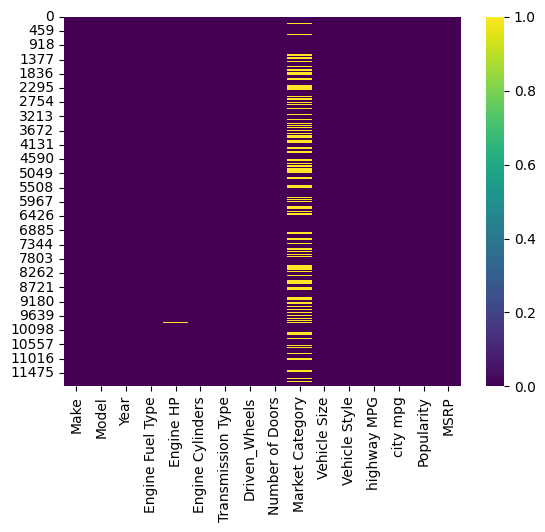

In [40]:
# 2. DETECT MISSING VALUES
print(f"Missing values in dataset are: {df.isnull().sum()}")
sns.heatmap(df.isnull(),cmap='viridis')

In [44]:
# 3. HANDLE MISSING VALUE
num_col = df.select_dtypes(include='number').columns
cat_col = df.select_dtypes(include='object').columns

df[num_col] = df[num_col].fillna(df[num_col].median)
df[cat_col] = df[cat_col].fillna(df[cat_col].mode)

df.isnull().sum()  # VERIFYING

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [45]:
# 4.HANDLE DUPLICATES
df.duplicated().sum()              #715
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [46]:
# 5. HANDLE OUTLIERS
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3-Q1
Min = Q1-(1.5*IQR)
Max = Q3+(1.5*IQR)

df = df[~((df[num_col]<Min) | (df[num_col]>Max)).any(axis=1)]
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


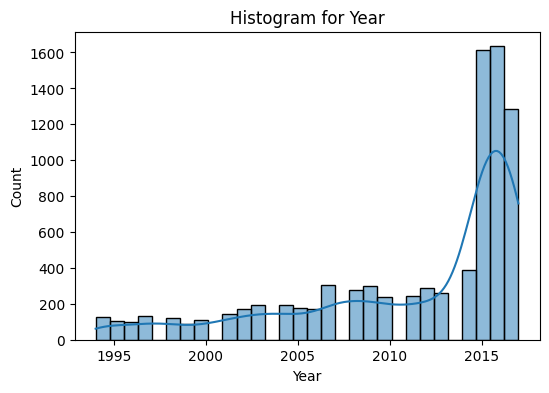

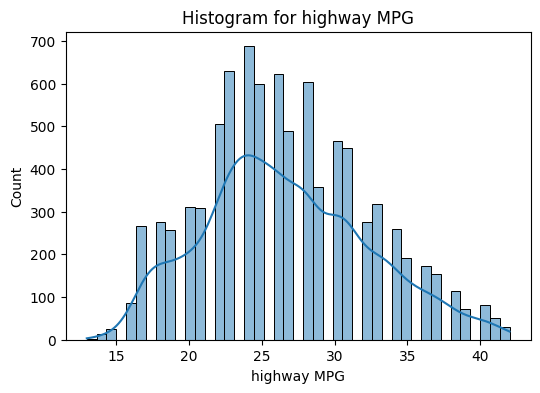

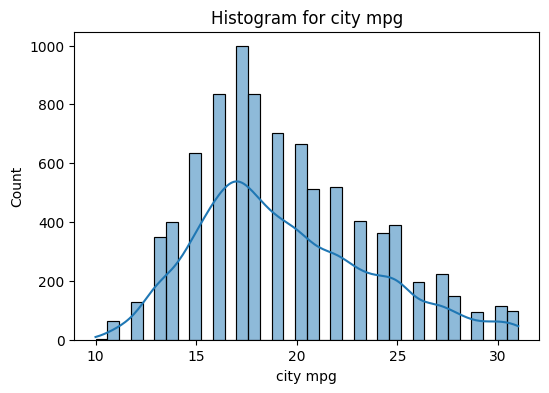

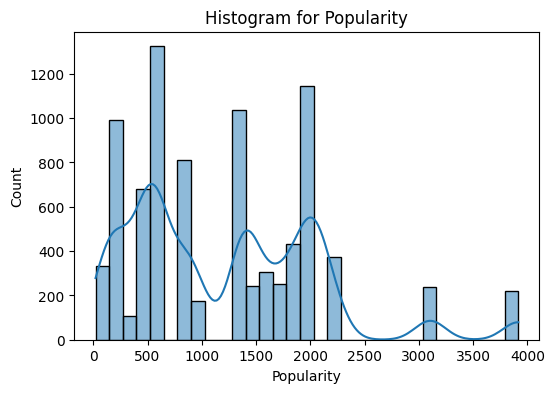

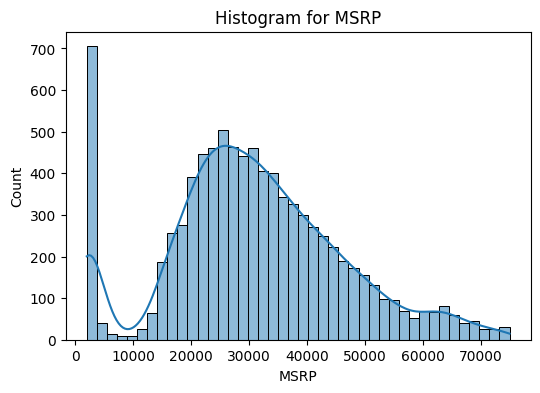

In [47]:
# 6. Visuals

for cols in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[cols],kde=True)
    plt.title(f"Histogram for {cols}")
    plt.show()

In [48]:
df['Model'].value_counts().sort_values(ascending=False)

Model
Silverado 1500    156
Tundra            129
Sierra 1500        90
Frontier           76
Accord             74
                 ... 
Cayman S            1
V90                 1
V8                  1
1 Series M          1
Zephyr              1
Name: count, Length: 651, dtype: int64

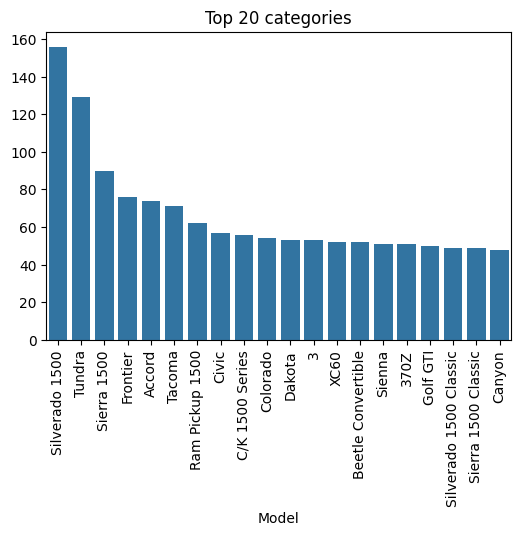

In [49]:
counts = df['Model'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=counts.index[:20], y=counts.values[:20])   # top 20 only
plt.xticks(rotation=90)
plt.title("Top 20 categories")
plt.show()


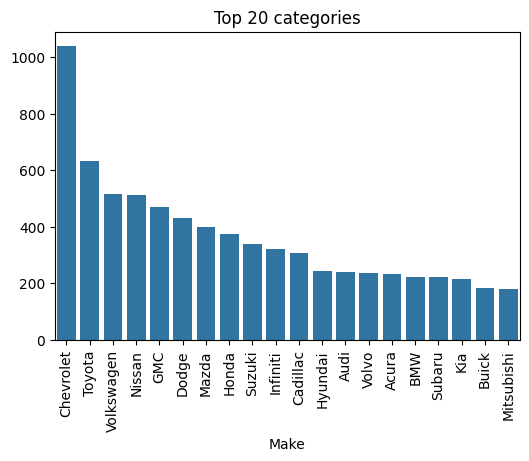

In [50]:
counts = df['Make'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=counts.index[:20], y=counts.values[:20])   # top 20 only
plt.xticks(rotation=90)
plt.title("Top 20 categories")
plt.show()

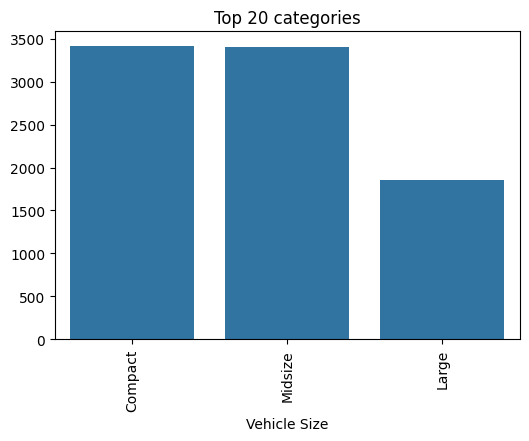

In [51]:
counts = df['Vehicle Size'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=counts.index[:20], y=counts.values[:20])   # top 20 only
plt.xticks(rotation=90)
plt.title("Top 20 categories")
plt.show()

In [52]:
cat_col    #Make  Model   Vehicle Size    

Index(['Make', 'Model', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Driven_Wheels', 'Number of Doors',
       'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

In [71]:
df['Engine HP'].value_counts()

Engine HP
200.0    314
240.0    249
285.0    244
170.0    230
210.0    228
        ... 
102.0      1
361.0      1
90.0       1
151.0      1
163.0      1
Name: count, Length: 252, dtype: int64

In [53]:
df.to_csv("Cleaned Dataset.csv",index=False)

In [74]:
df['Engine HP'].value_counts()

Engine HP
200.0    314
240.0    249
285.0    244
170.0    230
210.0    228
        ... 
102.0      1
361.0      1
90.0       1
151.0      1
163.0      1
Name: count, Length: 252, dtype: int64

In [77]:
top_10 = df['Engine HP'].value_counts().sort_values(ascending=False).head(10)
top_10

Engine HP
200.0    314
240.0    249
285.0    244
170.0    230
210.0    228
185.0    224
300.0    184
138.0    183
355.0    158
155.0    145
Name: count, dtype: int64

##### Following insights are taken from dataset :-
1. The vehicle efficiency is been degraded (mpg) on highway after passing through a huge boom.

2. Popularity for the vehicles is also linear didnt saw any increase after a particular period.

3. Top 5 models preferred by customers are:
                Silverado 1500

                Tundra

                Sierra 1500

                Frontier

                Accord

4. Top 5 Makers leading the car market is :-
                Chevrolet

                Toyota

                Volkswagen

                Nissan

                GMC

5. Top sizes preferred by the customers is :-
                Compact

                Midsize

6. Engine HP of the vehicles is also considerable didnt see any high changes on regular basis.

7. Overall,company can get maximum profit by improving the Engine Hp and mpg and targeting the top rated or favoured size.